In [1]:
import pandas as pd

# Load the dataset
# Replace 'your_dataset.csv' with the actual path or URL of your dataset
sales_data = pd.read_csv('WALMART_SALES_DATA.csv')

# Display the first few rows of the dataset
print("Original dataset:")
print(sales_data.head())

# Check for missing values
print("\nMissing values before removal:")
print(sales_data.isnull().sum())


Original dataset:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  

Missing values before removal:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [4]:
import plotly.express as px

# Assuming 'CPI', 'Weekly_Sales', 'Fuel_Price', and 'Holiday_Flag' are columns in your DataFrame
# Convert 'Holiday_Flag' to categorical with labels
sales_data['Holiday_Flag'] = sales_data['Holiday_Flag'].astype(str).replace({'0': 'Non-Holiday', '1': 'Holiday'})

# Define color map for 'Holiday_Flag'
color_map = {'Non-Holiday': '#d34e5b', 'Holiday': 'khaki'}

# Create separate DataFrames for holiday and non-holiday periods
holiday_data = sales_data[sales_data['Holiday_Flag'] == 'Holiday']
non_holiday_data = sales_data[sales_data['Holiday_Flag'] == 'Non-Holiday']

# Create 'Holiday_Flag_Num' column
sales_data['Holiday_Flag_Num'] = sales_data['Holiday_Flag'].map({'Non-Holiday': 0, 'Holiday': 1})

scatter_cwf = px.scatter_3d(sales_data, x='CPI', y='Weekly_Sales', z='Fuel_Price', color='Holiday_Flag', 
                             title='3D Scatter Plot of CPI, Weekly Sales, and Fuel Price',
                             color_discrete_map=color_map,
                             category_orders={'Holiday_Flag': ['Non-Holiday', 'Holiday']})

# Increase the size of the plot
scatter_cwf.update_layout(height=650, width=800)

scatter_cwf.show()

# Calculate average Fuel Price during holidays and non-holidays
average_fuel_price_holiday = holiday_data['Fuel_Price'].mean()
average_fuel_price_non_holiday = non_holiday_data['Fuel_Price'].mean()

# Calculate average CPI during holidays and non-holidays
average_cpi_holiday = holiday_data['CPI'].mean()
average_cpi_non_holiday = non_holiday_data['CPI'].mean()

# Print average values
print(f"Average Fuel Price during Holidays: {average_fuel_price_holiday}")
print(f"Average Fuel Price during Non-Holidays: {average_fuel_price_non_holiday}")

print(f"Average CPI during Holidays: {average_cpi_holiday}")
print(f"Average CPI during Non-Holidays: {average_cpi_non_holiday}")

# Calculate correlation coefficients
correlation_fuel_holiday = sales_data['Fuel_Price'].corr(sales_data['Holiday_Flag_Num'])
correlation_fuel_ws = sales_data['Fuel_Price'].corr(sales_data['Weekly_Sales'])
correlation_holiday_ws = sales_data['Holiday_Flag_Num'].corr(sales_data['Weekly_Sales'])
correlation_cpi_holiday = sales_data['CPI'].corr(sales_data['Holiday_Flag_Num'])
correlation_cpi_ws = sales_data['CPI'].corr(sales_data['Weekly_Sales'])

# Print correlation values
print(f"Correlation between Fuel Price and Holiday Flag: {correlation_fuel_holiday}")
print(f"Correlation between Fuel Price and Weekly Sales: {correlation_fuel_ws}")
print(f"Correlation between Holiday Flag and Weekly Sales: {correlation_holiday_ws}")
print(f"Correlation between CPI and Holiday Flag: {correlation_cpi_holiday}")
print(f"Correlation between CPI and Weekly Sales: {correlation_cpi_ws}")


Average Fuel Price during Holidays: 3.2274644444444442
Average Fuel Price during Non-Holidays: 3.3684671679197993
Average CPI during Holidays: 171.26809160977777
Average CPI during Non-Holidays: 171.60172484419382
Correlation between Fuel Price and Holiday Flag: -0.07834651805167625
Correlation between Fuel Price and Weekly Sales: 0.009463786314475071
Correlation between Holiday Flag and Weekly Sales: 0.036890968010414395
Correlation between CPI and Holiday Flag: -0.002162091274424782
Correlation between CPI and Weekly Sales: -0.07263416204017645


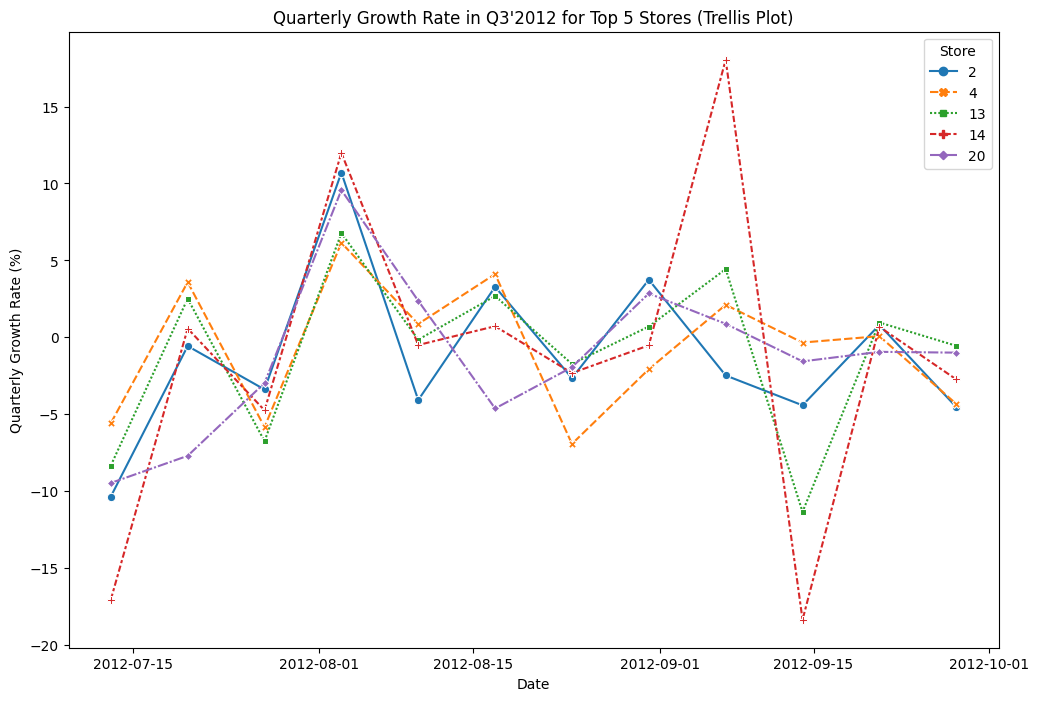

Maximum Quarterly Growth Rate for Top 5 Stores:
Store
14    18.047637
2     10.704716
20     9.571067
13     6.775785
4      6.145643
Name: Quarterly_Growth, dtype: float64

Minimum Quarterly Growth Rate for Top 5 Stores:
Store
4     -6.932158
20    -9.472856
2    -10.356674
13   -11.352835
14   -18.362607
Name: Quarterly_Growth, dtype: float64
Maximum Sales for Top 5 Stores:
Store
20    2358055.30
4     2283540.30
13    2184980.35
2     2041507.40
14    1904512.34
Name: Weekly_Sales, dtype: float64

Minimum Sales for Top 5 Stores:
Store
4     2027620.23
13    1914430.53
20    1911559.10
2     1746470.56
14    1479514.66
Name: Weekly_Sales, dtype: float64


In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' is the name of the date column in your DataFrame
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%m-%Y')

# Extract the year and quarter from the date
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Quarter'] = sales_data['Date'].dt.quarter

# Calculate total sales for each store
total_sales_by_store = sales_data.groupby('Store')['Weekly_Sales'].sum()

# Choose the top 5 stores based on total sales
top_stores = total_sales_by_store.nlargest(5).index

# Filter the DataFrame to include only the top 5 stores
subset_data = sales_data[sales_data['Store'].isin(top_stores)]

# Filter data for Q3'2012
q3_2012_data = subset_data[(subset_data['Year'] == 2012) & (subset_data['Quarter'] == 3)].copy()

# Calculate Quarterly Growth Rate
q3_2012_data['Quarterly_Growth'] = q3_2012_data.groupby('Store')['Weekly_Sales'].pct_change() * 100

# Define a custom color palette with distinct colors for each store
custom_palette = sns.color_palette("tab10", n_colors=len(top_stores))

# Trellis Plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Quarterly_Growth', hue='Store', data=q3_2012_data, markers=True, style='Store', palette=custom_palette)
plt.title('Quarterly Growth Rate in Q3\'2012 for Top 5 Stores (Trellis Plot)')
plt.xlabel('Date')
plt.ylabel('Quarterly Growth Rate (%)')
plt.show()

# Print maximum and minimum values for Quarterly Growth Rate in descending order
max_values = q3_2012_data.groupby('Store')['Quarterly_Growth'].max().sort_values(ascending=False)
min_values = q3_2012_data.groupby('Store')['Quarterly_Growth'].min().sort_values(ascending=False)

print("Maximum Quarterly Growth Rate for Top 5 Stores:")
print(max_values)

print("\nMinimum Quarterly Growth Rate for Top 5 Stores:")
print(min_values)

# Maximum and Minimum Sales for Top 5 Stores (Descending Order)
max_sales = q3_2012_data.groupby('Store')['Weekly_Sales'].max().sort_values(ascending=False)
min_sales = q3_2012_data.groupby('Store')['Weekly_Sales'].min().sort_values(ascending=False)

# Print the results
print("Maximum Sales for Top 5 Stores:")
print(max_sales)

print("\nMinimum Sales for Top 5 Stores:")
print(min_sales)


In [6]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

# Define a custom pastel color palette
pastel_colors = ['khaki', 'lightgreen', '#d34e5b']

# Defining the holiday event dates
super_bowl_dates = ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']
labour_day_dates = ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013']
thanksgiving_dates = ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
christmas_dates = ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']

# Marking holiday events in the dataset
sales_data.loc[sales_data['Date'].isin(super_bowl_dates), 'Holiday_Event'] = 'Super Bowl'
sales_data.loc[sales_data['Date'].isin(labour_day_dates), 'Holiday_Event'] = 'Labour Day'
sales_data.loc[sales_data['Date'].isin(thanksgiving_dates), 'Holiday_Event'] = 'Thanksgiving'
sales_data.loc[sales_data['Date'].isin(christmas_dates), 'Holiday_Event'] = 'Christmas'

# Filtering data to include only holidays
holiday_data = sales_data[sales_data['Holiday_Event'].notnull()]

# Choose the top N stores based on total sales
top_n_stores = 10 
top_stores = holiday_data.groupby('Store')['Weekly_Sales'].sum().nlargest(top_n_stores).index
holiday_data_top = holiday_data[holiday_data['Store'].isin(top_stores)]

# Grouping the data by the "Holiday_Event" and "Store" variables and sum the sales for each event and store
holiday_sales = holiday_data_top.groupby(['Holiday_Event', 'Store', 'Date'])['Weekly_Sales'].sum().reset_index()

# Extracting the year from the 'Date' column
holiday_sales['Year'] = pd.to_datetime(holiday_sales['Date'], format='%d-%m-%Y').dt.year

# Create labels for the TreeMap with HTML line breaks
holiday_sales['Label'] = holiday_sales.apply(lambda row: f"Store {row['Store']}<br>Year: {row['Year']}<br>${row['Weekly_Sales']:,.2f}", axis=1)

# Create a TreeMap without the color_discrete_map
fig = px.treemap(holiday_sales, 
                 path=['Holiday_Event', 'Store'], 
                 values='Weekly_Sales', 
                 color='Holiday_Event',
                 color_discrete_sequence=pastel_colors,
                 labels='Label',
                 title=f'TreeMap of Weekly Sales by Store and Holiday Event (Top {top_n_stores} Stores)')

# Use update_traces to add text annotations inside the treemap boxes
fig.update_traces(text=holiday_sales['Label'], 
                  hoverinfo='label+text',
                  textposition='middle center',  
                  textfont_size=10)  

# Customize the layout and manually set the overall plot size
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40),
                  autosize=False,
                  width=950,  
                  height=600)  

# Show the plot
fig.show()

# Print Key Observations
print("\nKey Observations from TreeMap Analysis:")
print("----------------------------------------")

# Identify top-performing stores during holidays
top_stores_holidays = holiday_sales.groupby('Store')['Weekly_Sales'].sum().nlargest(top_n_stores).index
print(f"Top {top_n_stores} Stores with Highest Overall Sales during Holidays: {', '.join(map(str, top_stores_holidays))}")

# Identify the holiday event with the highest overall sales
top_holiday = holiday_sales.groupby('Holiday_Event')['Weekly_Sales'].sum().idxmax()
print(f"\nHoliday Event with Highest Overall Sales: {top_holiday}")

# Display the total sales during the highest sales holiday event
total_sales_top_holiday = holiday_sales[holiday_sales['Holiday_Event'] == top_holiday]['Weekly_Sales'].sum()
print(f"Total Sales during {top_holiday}: ${total_sales_top_holiday:,.2f}")

# Identify the store with the highest sales during holidays
store_highest_sales = holiday_sales[holiday_sales['Weekly_Sales'] == holiday_sales['Weekly_Sales'].max()]['Store'].iloc[0]
print(f"Store with the Highest Sales during Holidays: Store {store_highest_sales}")


Key Observations from TreeMap Analysis:
----------------------------------------
Top 10 Stores with Highest Overall Sales during Holidays: 4, 20, 14, 10, 13, 2, 27, 6, 39, 1

Holiday Event with Highest Overall Sales: Thanksgiving
Total Sales during Thanksgiving: $52,039,451.64
Store with the Highest Sales during Holidays: Store 4


In [7]:
import plotly.express as px
import numpy as np

# Define a custom pastel color palette
pastel_colors = ['#d34e5b', 'khaki', 'mediumseagreen']

# Assuming 'Date' is the name of the date column in your DataFrame
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%m-%Y')

# Extract the year from the date
sales_data['Year'] = sales_data['Date'].dt.year

# Create a histogram distribution plot with Plotly Express for each year
fig = px.histogram(sales_data, x='Unemployment', y='CPI', color='Year',
                   hover_data=sales_data.columns, title='Relation between CPI and Unemployment (2010-2012)',
                   color_discrete_sequence=pastel_colors)
fig.show()

# Define intervals for Unemployment
unemployment_intervals = [(0, 5), (6, 11), (12, 17)]

# Create a new column 'Unemployment Interval' based on the defined intervals
sales_data['Unemployment Interval'] = pd.cut(sales_data['Unemployment'], bins=np.concatenate(([-np.inf], *[interval[1:] for interval in unemployment_intervals], [np.inf])),
                                            labels=['0-5', '6-11', '12-17', '18-23'])

# Group by 'Unemployment Interval' and calculate the average 'CPI' within each interval
average_cpi_by_interval = sales_data.groupby('Unemployment Interval')['CPI'].mean()

# Print the results
print("\nAverage CPI by Unemployment Interval:")
print(average_cpi_by_interval)



Average CPI by Unemployment Interval:
Unemployment Interval
0-5      137.360205
6-11     175.619718
12-17    128.379921
18-23           NaN
Name: CPI, dtype: float64


In [8]:
import plotly.express as px
import numpy as np

# Define a custom pastel color palette
custom_colors = ['blue', '#e75480', 'khaki']

# Assuming 'Date' is the name of the date column in your DataFrame
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%m-%Y')

# Extract the year from the date
sales_data['Year'] = sales_data['Date'].dt.year

# Create an interactive histogram with brushing and linking
fig = px.histogram(sales_data, x='Weekly_Sales', color='Year',
                   marginal='rug', # Adding rug plot to show individual data points
                   title='Interactive Histogram with Brushing and Linking',
                   color_discrete_sequence=custom_colors,
                   labels={'Weekly_Sales': 'Weekly Sales'},
                   hover_data=['Store', 'Year', 'Date'])

# Enable brushing and linking
fig.update_traces(marker=dict(opacity=0.6), selector=dict(type='bar'))

# Create a linked scatter plot
scatter_fig = px.scatter(sales_data, x='Temperature', y='Weekly_Sales',
                        color='Year', title='Linked Scatter Plot',
                        labels={'Temperature': 'Temperature', 'Weekly_Sales': 'Weekly Sales'},
                        hover_data=['Store', 'Year', 'Date'])

# Show the interactive plot
fig.show()

# Show the linked scatter plot separately
scatter_fig.show()
